In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_csv('pf_helpfulrating.csv')

In [24]:
df.head()

product_parent  star_rating  ...  review_date  helpful_rating
0       932874238            1  ...     6/5/2013             1.0
1       428946394            1  ...    1/11/2011             1.0
2       904214640            1  ...    4/11/2013             1.0
3       984531370            4  ...    4/11/2013             1.0
4       858196820            1  ...    2/15/2011             1.0

[5 rows x 7 columns]

In [15]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [0]:
sentiment = []
for review in df['review_body']:
  blob = TextBlob(review)
  sentiment.append(blob.sentiment.polarity)

df['sentiment'] = sentiment

In [0]:
import matplotlib.pyplot as plt

(array([1.300e+01, 1.000e+00, 2.000e+00, 0.000e+00, 5.000e+00, 1.000e+01,
        1.000e+01, 6.000e+00, 1.900e+01, 8.000e+00, 3.600e+01, 3.600e+01,
        3.300e+01, 7.600e+01, 7.600e+01, 1.770e+02, 1.820e+02, 2.900e+02,
        3.900e+02, 4.320e+02, 2.054e+03, 1.170e+03, 1.387e+03, 1.578e+03,
        1.317e+03, 1.639e+03, 1.345e+03, 1.124e+03, 8.900e+02, 5.500e+02,
        1.146e+03, 5.180e+02, 5.090e+02, 4.670e+02, 8.700e+01, 1.980e+02,
        3.830e+02, 1.060e+02, 5.600e+01, 6.110e+02]),
 array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
        -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
        -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
         0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
         0.8 ,  0.85,  0.9 ,  0.95,  1.  ]),
 <a list of 40 Patch objects>)

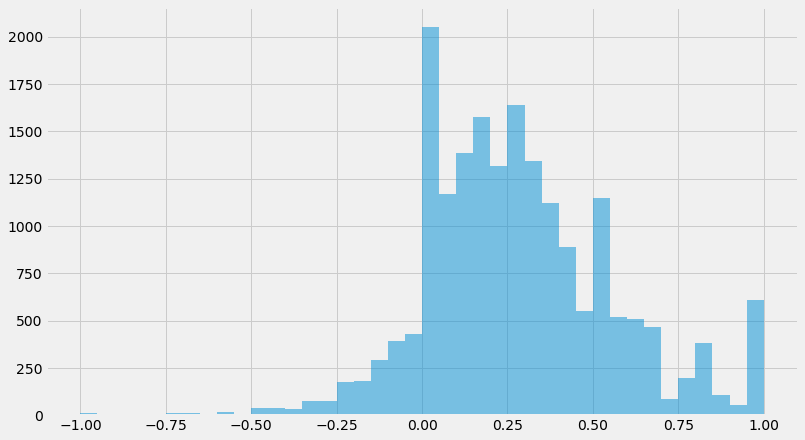

In [26]:
plt.hist(df['sentiment'], normed=False, alpha=0.5, bins=40)

(array([ 1192.,     0.,   945.,     0.,     0.,  1425.,     0.,  2716.,
            0., 12659.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 1 Patch objects>)

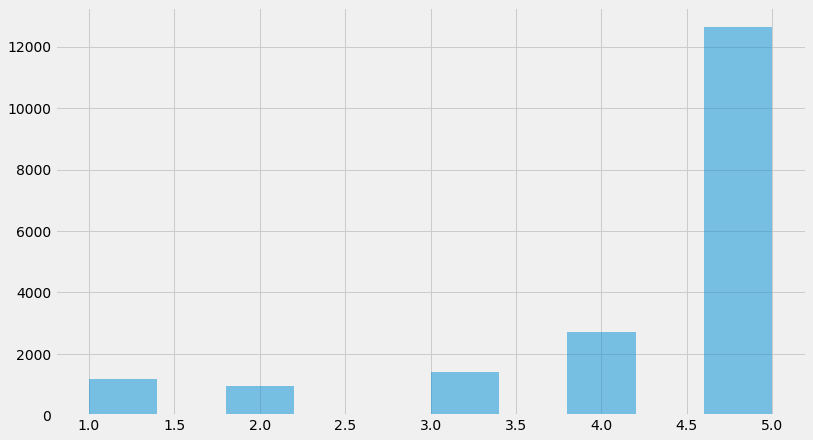

In [27]:
plt.hist(df['star_rating'], normed=False, alpha=0.5, histtype='stepfilled')

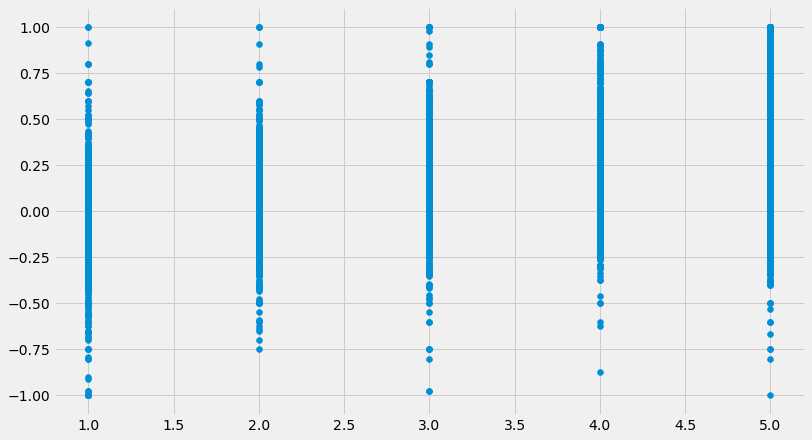

In [28]:
plt.scatter(df['star_rating'], df['sentiment'])

In [0]:
mean = df.groupby('star_rating')['sentiment'].mean()
std = df.groupby('star_rating')['sentiment'].std()

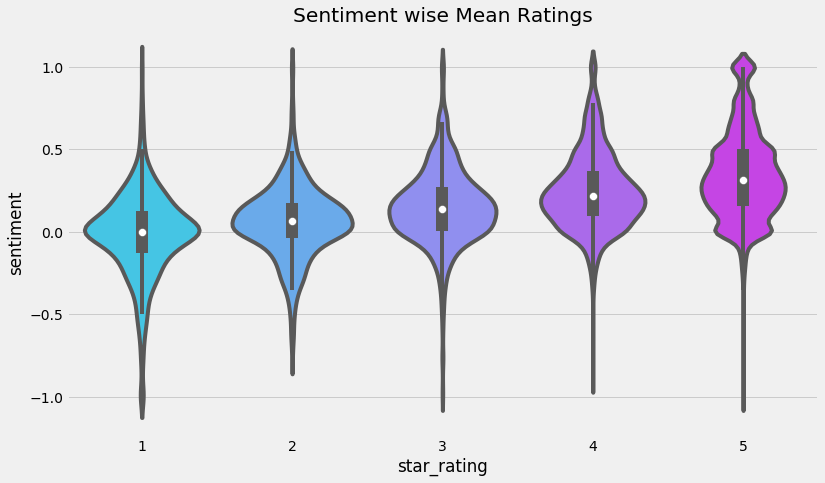

In [29]:
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.violinplot(df['star_rating'], df['sentiment'], palette = 'cool')
plt.title("Sentiment wise Mean Ratings")
plt.show()

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 6.000e+00, 2.000e+00,
        1.200e+01, 1.800e+01, 1.600e+01, 6.500e+01, 7.900e+01, 1.290e+02,
        1.930e+02, 2.210e+02, 1.474e+03, 7.990e+02, 1.038e+03, 1.261e+03,
        1.127e+03, 1.432e+03, 1.211e+03, 1.014e+03, 8.320e+02, 5.290e+02,
        1.071e+03, 4.890e+02, 4.950e+02, 4.350e+02, 8.700e+01, 1.970e+02,
        3.750e+02, 1.050e+02, 5.300e+01, 5.990e+02]),
 array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
        -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
        -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
         0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
         0.8 ,  0.85,  0.9 ,  0.95,  1.  ]),
 <a list of 40 Patch objects>)

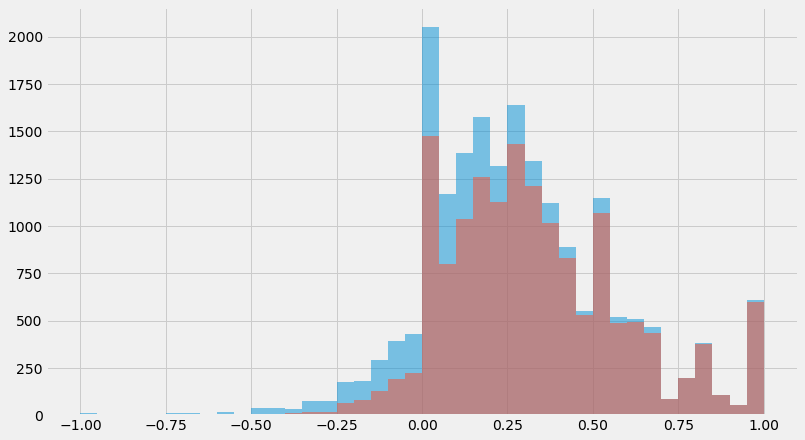

In [0]:
plt.hist(df['sentiment'], alpha=0.5, bins=40)
plt.hist(df[df['star_rating']>3]['sentiment'], alpha=0.5, bins=40)

In [30]:
df.head()

product_parent  star_rating  vine  ...  review_date helpful_rating sentiment
0       932874238            1     0  ...     6/5/2013            1.0 -0.010000
1       428946394            1     0  ...    1/11/2011            1.0  0.100000
2       904214640            1     0  ...    4/11/2013            1.0 -0.126667
3       984531370            4     0  ...    4/11/2013            1.0  0.283333
4       858196820            1     0  ...    2/15/2011            1.0  0.246429

[5 rows x 8 columns]

In [0]:
df.to_csv('pf_sentiment.csv')